# Comparative Analysis of Literacy Assessments Scores of Native- and Foreign-born children using PIRLS 2021 Data

## Introduction

In the below analysis I use data sourced from IEA’s Progress in International Reading Literacy Study 2021 (PIRLS 2021) to assess literacy assessment scores for native and foreign-born children across nine countries with significant refugee populations. This study should be considered as a preliminary quantitative study to identify countries that are exhibiting best practice regarding the integration of foreign-born children into host country school systems. 

### About PIRLS

PIRLS is an international assessment of reading for fourth graders conducted every five years, starting in 2001. In total, almost 400,000 children were assessed in the 2021 cohort, across 57 countries. As well as reading assessments, the PIRLS data also contains answers to context questionnaires conducted with students, parents, teachers and schools, providing invaluable insight into the reality of learning environments.

For more information on PIRLS, please see [here.](https://www.iea.nl/studies/iea/pirls)

SOURCE: IEA’s Progress in International Reading Literacy Study – PIRLS 2021 Copyright © 2023 International Association for the Evaluation of Educational Achievement (IEA). Publisher: TIMSS & PIRLS International Study Center, Lynch School of Education and Human Development, Boston College.

### Data Compiling, Cleaning and Filtering

Data for this analysis was downloaded [here](https://pirls2021.org/data/) as separate SPSS files for questionnaire type and country. 

After a brief analysis of what each data source provided, I chose files to use, converted them to excel files and concatenated them into one dataset. I then cleaned and filtered this new dataset. 
 
To view these processes, please <a href="https://github.com/SophieESpencer/Comparison/tree/main/Final%20Notebooks">click here</a>.
 

## Importing the data and relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandataiqr17125.xlsx', index_col=0)

## Organising and Understanding Columns

During the cleaning process, I used these groupings of columns to help understand the data:

In [3]:
main_variables = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
feelings_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
experiences_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

As we can see above, the columns may be divided into:
- The main independent variables for this analysis (Country and birth status)
- Demographic information columns which have mainly been taken from the Home Context Survey data (answered by parents)
- Columns relating to children's feelings in school (self-reported)
- Experience in school columns which relate to the frequency of negative experience in school (self-reported)
- Assessment score columns (test scores)

# Literacy Test Scores

In this analysis I will be looking predominantly at the assessment score columns. The first thing I want to investigate is how literacy scores differ for foreign and native-born children across countries. 

## Average Score Leaderboard

First of all, I want to use the 'avgscore' column which was generated in the cleaning stage, to gain an idea of how country averages compare. Please note, I used interquartile range filtering to filter the data in the previous stage so I am quite confident in the validity of this data.

In [4]:
# Create a pivot table of country averages and sort highest to lowest
df_avg_pivot = df.pivot_table(values='avgscore', index='Country').sort_values(by='avgscore', ascending=False)

<Figure size 864x432 with 0 Axes>

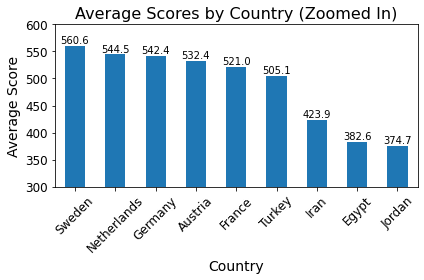

In [5]:
# Create a large figure
plt.figure(figsize=(12, 6))

# Plot the sorted bar chart with unique colors
ax = df_avg_pivot.plot(kind='bar', legend=False)

# Customizing the plot
plt.title('Average Scores by Country (Zoomed In)', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Set y-axis limits to zoom in between 300 and 600
plt.ylim(300, 600)

# Annotate each bar with its value
for i, value in enumerate(df_avg_pivot['avgscore']):
    plt.text(i, value + 5, f'{value:.1f}', ha='center', fontsize=10, color='black')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

I want to use the above order of countries for all my visualisations going forward.

In [12]:
country_order = df_avg_pivot.reset_index()["Country"].to_list()

In [13]:
country_order

['Sweden',
 'Netherlands',
 'Germany',
 'Austria',
 'France',
 'Turkey',
 'Iran',
 'Egypt',
 'Jordan']

### Observations

- As we can see above, Swedish students are achieving on average the highest scores, with Jordan achieving the lowest.  

- Sweden is closely followed by Netherlands, Germany, Austria. France and Turkey in that order, all with average scores above 500. Turkey is followed by Iran with an average score of 423.9 and then Egypt and Jordan with average scores of 382.6 and 374.7 respectively. 

-  I would expect Sweden, Netherlands, Germany, Austria and France to have higher achieving students than the other countries as these are Western European countries with high GDPs. 

**Middle Income Countries**
- Turkey and Jordan are upper-middle income countries. Iran and Egypt are lower-middle income countries. 

- It is surprising that Turkey performs significantly better than the others. Is it a middle-income country. 

- It is also telling that Egypt outperforms Jordan despite Jordan having a higher GDP and being considered a upper-middle income country. 

### Comparison with benchmarks

In [6]:
df['avgscore'].describe()

count    41158.000000
mean       466.971053
std        109.754016
min        160.574553
25%        395.985095
50%        483.052609
75%        550.627011
max        757.011431
Name: avgscore, dtype: float64

Now I want to investigate whether there is a disparity in assessment scores between native- and foreign-born children in these countries. 

## Comparing Assessment Scores of Native- and Foreign-Born Children

In [7]:
pivot_foreign = df[df['ASBH02A'] == 'foreign_born'].pivot_table(values='avgscore',index='Country').sort_values(by='avgscore',ascending=False).reset_index()

In [8]:
pivot_native = df[df["ASBH02A"]=='native_born'].pivot_table(values='avgscore',index='Country').sort_values(by='avgscore',ascending=False).reset_index()

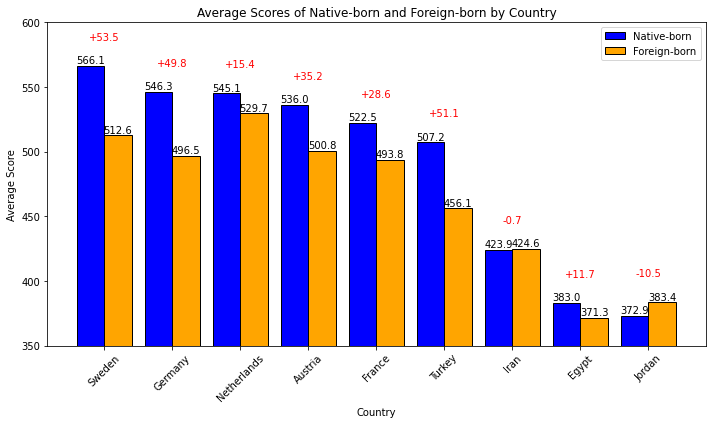

In [9]:
# Ensure native and foreign-born data are aligned by country
merged = pd.merge(
    pivot_native[['Country', 'avgscore']], 
    pivot_foreign[['Country', 'avgscore']], 
    on='Country', 
    suffixes=('_native', '_foreign')
)

# Extract aligned data
countries = merged['Country']
native_scores = merged['avgscore_native']
foreign_scores = merged['avgscore_foreign']

# Calculate differences
differences = native_scores - foreign_scores

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.4

# Positions of bars
x = np.arange(len(countries))

# Set y-axis limits to zoom in between 350 and 600
plt.ylim(350, 600)

# Plot native-born (fully opaque)
plt.bar(
    x - bar_width / 2,
    native_scores,
    width=bar_width,
    alpha=1,
    color="blue",
    edgecolor="black",
    label="Native-born",
)

# Plot foreign-born (fully opaque)
plt.bar(
    x + bar_width / 2,
    foreign_scores,
    width=bar_width,
    alpha=1,
    color="orange",
    edgecolor="black",
    label="Foreign-born",
)

# Annotate with differences and bar heights
for i, (native, foreign, diff) in enumerate(zip(native_scores, foreign_scores, differences)):
    # Position annotation dynamically above the taller bar for the difference
    taller_y = max(native, foreign)
    plt.text(
        x[i],
        taller_y +20,  # Slightly above the taller bar
        f"{diff:+.1f}",  # Difference with a sign
        ha="center",
        fontsize=10,
        color="red",
    )

    # Annotate native-born bar height
    plt.text(
        x[i] - bar_width / 2,
        native + 2,  # Slightly above the native bar
        f"{native:.1f}",
        ha="center",
        fontsize=10,
        color="black",
    )

    # Annotate foreign-born bar height
    plt.text(
        x[i] + bar_width / 2,
        foreign + 2,  # Slightly above the foreign bar
        f"{foreign:.1f}",
        ha="center",
        fontsize=10,
        color="black",
    )

# Adding labels and legend
plt.xticks(x, countries, rotation=45)
plt.xlabel("Country")
plt.ylabel("Average Score")
plt.title("Average Scores of Native-born and Foreign-born by Country")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


### Observations

From this visualisation we can see that:

#### Leaderboard for Foreign-born Children

- Despite Sweden being on top of the leadersboard for average scores of all children, in terms of scores for foreign-born students, Netherlands takes first place, with a 17.1 lead on foreign-born children in Sweden. 

- Likewise, despite Germany being in second place with overall scores, it is in fourth place for foreign-born children, behind Austria in third place. 

- Although Sweden and Germany are besting the Netherlands and Austria respectively in terms of overall literacy scores, the Netherlands and Austria are outperforming these particular rivals in terms of foreign-born children's results.

- Another difference is at the other end of the leaderboard where foreign-born Jordanian students are in eighth place and those in Egypt are in ninth place, despite these countries being in the reverse positions in terms of average overall scores.  

#### Native vs Foreign

- Native born children outperform their foreign born peers in every country apart from Iran and Jordan. 

- Sweden, Turkey, and Germany have the largest disparity in scores between native and foreign-born students, with native-born students in these countries achieving 53.5, 51.1 and 49.8 marks higher than foreign-born peers. 

- The Netherlands has the smallest disparity between native and foreign-born children in a high-income country, with an average difference of 15.4 marks. 

- Iran has the smallest disparity in marks between Foreign- and native- born children with foreign-born children actually achieving marks 0.7 higher than their native-born peers. 

- Apart from Turkey, with a large disparity between students, on average middle_income countries show smaller disparities. This may also be die to foreign-born students in Iran, Egypt and Jordan sharing a mother tongue with their native-born peers. 

- Jordan is an interesting case, where foreign children are achieving 10.5 marks higher than native-born peers. As Jordan hosts both Syrian and Palestinian refugees, it might be that most Syrian children are considered foreign-born and Palestinian are considered native-born? 

#### Summary

The Netherlands seems to be leading the way in terms of achieving high scores for foreign-born students, achieving even better scores than some native-born children in other high income countries. It would therefore be very useful to understand what techniques are being used in Dutch schools to achieve these results. 

This stage has thrown up some interesting results particularly in lower income host countries. In the next stages, I will investigate how age of arrival affects results for foreign-born children.

## Literacy Minimum Age of Arrival

In [10]:
pivot_minage_literacy = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [14]:
# Reindex the DataFrame based on the custom order
pivot_minage_literacy = pivot_minage_literacy.reindex(country_order)

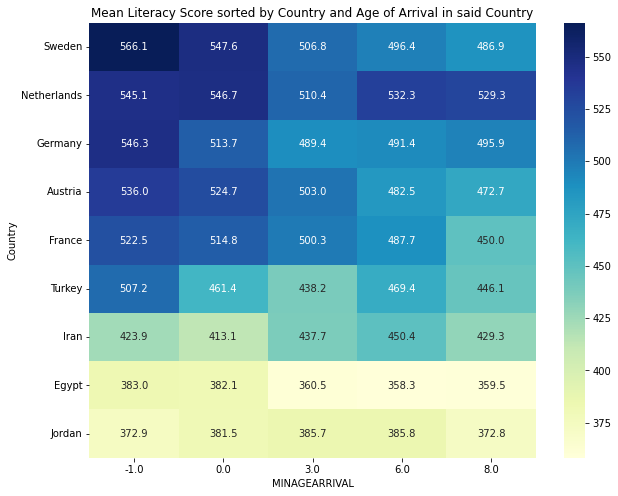

In [15]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_minage_literacy, annot=True,fmt=".1f", cmap='YlGnBu')
plt.title('Mean Literacy Score sorted by Country and Age of Arrival in said Country')
plt.show()

### maybe do a max and min column above?

### Observations

**Age of Arrival effect on scores**

We would expect the older you arrive, the more difficult it would be to assimilate as the less likely you are to speak the language and your parents to speak the language. 

This hypothesis only holds in Sweden, Austria, France, where we see a gradual decrease in attainment the older the children arrive in country, with native students doing the best. 

In Netherlands, Germany, and Turkey, children who arrived between the ages of 3 and 6 perform the worst overall. As these children were 10 in 2021 they would have arrived between 2014 and 2017 and this is perhaps reflecting these countries' struggle to accomodate an influx of foreign-born children at this time?

**Netherlands**

As we saw in the previous visualisation, Netherlands appears to be doing something right with foreign-born children. 

- Foreign-born children arriving under the age of 3 in the Netherlands are out-performing all their peers, including native-born peers by a small amount. 

- Children arriving after the age of 8 in the Netherlands are performing very well, even performing better than native born children in France, Turkey, Iran, Jordan and Egypt. 

**Summary**

The Netherlands is out performing all othre countries. There is a need to corroborate this data with the age data to understand the actual year that children arrived as they may have been held back in school (they may not all be ten years old). We should remember that the sample sizes for non-native children may be quite small. I will look at this in the next stage.

#### Corroborate above data with age data

In [16]:
pivot_counts = df.pivot_table(
    index=['Country'],
    columns=['MINAGEARRIVAL'],
    aggfunc='size',
    fill_value=0  # Replace NaN values with 0 for counts
)

In [18]:
pivot_counts

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Austria,4025,123,175,91,59
Egypt,6992,113,42,39,25
France,4526,81,71,49,25
Germany,2317,53,75,36,32
Iran,5689,40,15,19,16
Jordan,4731,501,280,101,27
Netherlands,1947,26,16,18,11
Sweden,2681,82,108,74,39
Turkey,5366,89,70,53,15


Given the above small sample sizes a further investigation into these students and whether they all come from the same school, would be useful. (only 11 after age 8 in the netherlands.) would be interesting to get as much info as poss on these kids. 

## Experience in School Heatmap

In [ ]:
df_experience = df[main_variables+experiences_in_school_columns]

In [ ]:
pivot_experience = df_experience.pivot_table(values=experiences_in_school_columns, index=main_variables, aggfunc='mean')

In [ ]:
# Calculate the total average for each row
pivot_experience['MeanTotal'] = pivot_experience[experiences_in_school_columns].mean(axis=1)

In [ ]:
sorted_pivot_experience = sort_pivot_table(pivot_experience, 'MeanTotal', 'ASBH02A', asbh02a_sorter)

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_experience, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

The below is the order for *all* students - it is different for foreign and native-born students. 

|**Feelings**  | **Experience**|
|------------- |----------------|
|1. Jordan     |1. France       |
|2. Turkey     |2. Jordan       |
|3. Netherlands|3. Turkey       |
|4. Iran       |4. Sweden.      |
|5. Germany    |5. Germany.     |
|6. Egypt      |6. Netherlands. |
|7. Sweden     |7. Iran.        |
|8. Austria    |8. Austria      |
|9. France     |9. Egypt.       |

### I need to rearrange this so that dark colours (good are at the top).

Native born kids are having less negativ experiences in school as we would expect. Egypt is the worst, followed by Austria. These statistics are quite heartening overall, with most cohorts answering never or a few times a year for negative experiences. 

During this year, how often have other students from your school done any of the following things to you, including through texting or the internet?


A: Made fun of me or called me names\
B: Left me out of their games or activities\
C: Spread lies about me\
D: Stole something from me\
E: Damaged something of mine on purpose\
F: Hit or hurt me (e.g., shoving, hitting, kicking)\
G: Made me do things I didn’t want to do\
H: Sent me nasty or hurtful messages online\
I: Shared nasty or hurtful information about me online\ 
J: Threatened me\


1 = At least once a week\
2 = Once or twice a month\
3 = A few times a year\
4 = Never

Surprisingly, Iranian students report the least negative experiences in school of all countries. 

## Experience Average Distribution

In [ ]:
df['experienceavg'] = df[experiences_in_school_columns].mean(axis=1)

In [ ]:
df['experienceavg_binned'] = pd.cut(df['experienceavg'], bins=10)

In [ ]:
# Create a contingency table
contingency_experience = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['experienceavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='experienceavg_binned',
        value_name='count'
    )
)

In [ ]:
heatmap_experience_native_born = generate_heatmap(
    data=contingency_experience,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

heatmap_experience_foreign_born = generate_heatmap(
    data=contingency_experience,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

#### Plotting

In [ ]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_experience_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_experience_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
diff_data_experience = heatmap_experience_native_born - heatmap_experience_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data_experience, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [ ]:
pivot_minage_experience = df.pivot_table(values='experienceavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [ ]:
mean_scores_test = (
        pivot_minage_experience.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

In [ ]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_test, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

# Further Research

comparisons with bench marks - through line? 

Should compare reading scores with the benchmark and can also compare with previous years.

**Comparison with data from previous years**

How other demographic factors - parents level of education etc. affect scores.